<a href="https://colab.research.google.com/github/HuyHoang-20146252/AI_W4_Fuzzy_25_02_03/blob/main/vietnamfood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

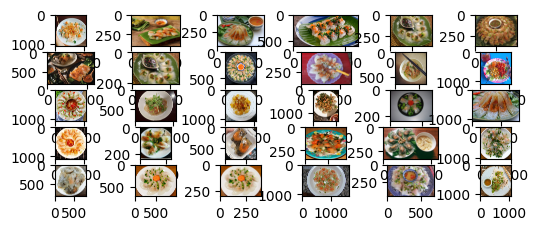

In [2]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/DoAnVN/'
for i in range(30):
  plt.subplot(10,6,i+1)
  filename=folder+'/Banhbotloc ('+str(i+1)+').jpg'
  img=imread(filename)
  plt.imshow(img)
plt.imshow(img)

In [3]:
from numpy import asarray
from os import listdir
from numpy import asarray,save
from keras.utils import img_to_array,load_img
folder = '/content/drive/MyDrive/DoAnVN/'
photos, labels=list (),list()
for file in listdir(folder):
  output=0.0
  if file.startswith ('Banhbotloc '):
    output=1.0
  if file.startswith ('Banhcan '):
    output=2.0
  if file.startswith ('Banhduc '):
    output = 3.0
  if file.startswith ('Banhbeo '):
    output = 4.0
  if file.startswith ('Banhchung '):
    output = 5.0
  if file.startswith ('Banhcuon '):
    output=6.0
  if file.startswith ('Banhgio '):
    output=7.0
  if file.startswith ('Banhmi '):
    output = 8.0
  if file.startswith ('Banhkhot '):
    output = 9.0
  if file.startswith ('Banhpia '):
    output = 10.0
  img =load_img(folder+ file,target_size=(30,40))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)
photos =asarray(photos)
labels =asarray(labels)
print(photos.shape,labels.shape)
save('VNFood_photo.npy',photos)
save('VNFood_labels.npy',labels)
import numpy as np
x_train = np.load('/content/VNFood_photo.npy')
y_train = np.load('/content/VNFood_labels.npy')
print(x_train.shape)
print(y_train.shape)
x=x_train
y=y_train

(1734, 30, 40, 3) (1734,)
(1734, 30, 40, 3)
(1734,)


In [4]:
from keras.utils import to_categorical
x_train = x_train.astype('float32')/255
y_train = to_categorical(y_train,100)


In [5]:
from keras.backend import flatten
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.optimizers import Adam
#32 lần
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape=(30,40,3),padding='Same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

#64 lần
model.add(Conv2D(64,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

#128 lần
model.add(Conv2D(128,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(100,activation='softmax'))
from keras.losses import categorical_crossentropy
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
model.summary()
train = model.fit(x_train,y_train,epochs=128,batch_size=64,verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 40, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 20, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 15, 20, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 15, 20, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 10, 64)        0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 8, 10, 64)        

1/1 [==============================] - 0s 27ms/step


'Banhmi'

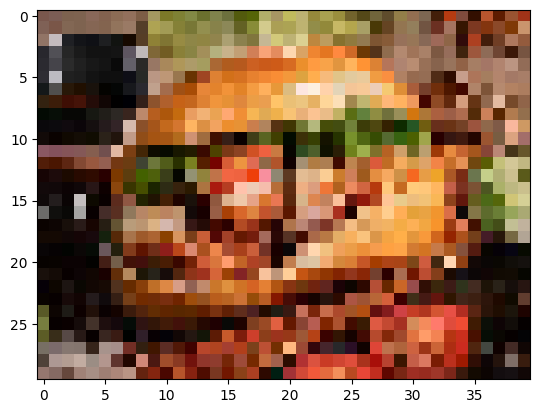

In [7]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
vat = {1: 'Banhbotloc',2:'Banhcan', 3:'Banhduc', 4:'Banhbeo',5:'Banhchung', 6:'Banhcuon',7:'Banhgio', 8:'Banhmi',9:'Banhkhot', 10:'Banhpia'}
img = load_img("/content/drive/MyDrive/anhbanhmi_test.jpg",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
vat[result[0]]

In [8]:
model.save('VNFood.h5')
